In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt



In [2]:
fileloc='D:/Lakshmi Mohandas/Bits/ss/Sem2/DM/Assignment/data/'

In [3]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

from sklearn.metrics import davies_bouldin_score

In [4]:
shilout=np.zeros((56,20))
dbinx=np.zeros((56,20))
otnoc=np.zeros((56,20))
otnoc1=np.zeros((56,20))

In [5]:
for i in range(1,57): 
    
    fname=fileloc+str(i)+'.csv'
    data=np.genfromtxt(fname,delimiter=',')
    
    for j in range(0,20): 
        sv=np.zeros((9))
        dbv=np.zeros((9))
        
        for k in [2,3,4,5,6,7,8,9,10]:

            if np.shape(np.unique(data[:,j]))[0]>k:
                kmeans = KMeans(n_clusters=k, random_state=0).fit(data[:,j].reshape(-1,1))

                sv[k-2]=silhouette_score(data[:,j].reshape(-1,1),kmeans.labels_,metric='euclidean')

                dbv[k-2]=davies_bouldin_score(data[:,j].reshape(-1,1),kmeans.labels_)
    
        
        s1=np.max(sv) # find best silhouette_score

        s2=np.argmax(sv) # find optimal number of cluster

        shilout[i-1,j]=s1

        otnoc[i-1,j]=s2+2

        s1=np.min(dbv)

        s2=np.argmin(dbv)

        dbinx[i-1,j]=s1

        otnoc1[i-1,j]=s2+2

        fname=fileloc+'shilout.csv' # save shilout value

        np.savetxt(fname,shilout, delimiter=',', fmt='%f')  

        fname=fileloc+'dbinx.csv' # save db_index value

        np.savetxt(fname,dbinx, delimiter=',', fmt='%f')  

        fname=fileloc+'best_cluster_shil.csv' # save optimal number of cluster

        np.savetxt(fname,otnoc, delimiter=',', fmt='%f')  

        fname=fileloc+'best_cluster_dbinx.csv' # save optimal number of cluster based on db_index

        np.savetxt(fname,otnoc1, delimiter=',', fmt='%f')  

### Which feature is best to make group?

#### From the boxplot, Feature 2,3,13,17 is having maximum silhouette score.

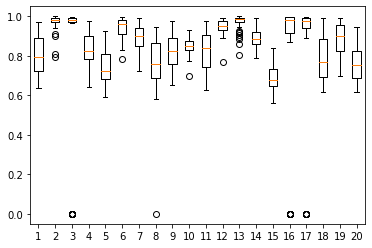

In [97]:
shilout_data = np.genfromtxt(fileloc+'shilout.csv', delimiter=',')
plt.boxplot(shilout_data)
plt.savefig(fileloc+'/output_images/maxsilhouettescore.png')

### Optimal no of cluster for feature 2 in 56 dataset

#### No of clusters=2 (Maximum value >40)

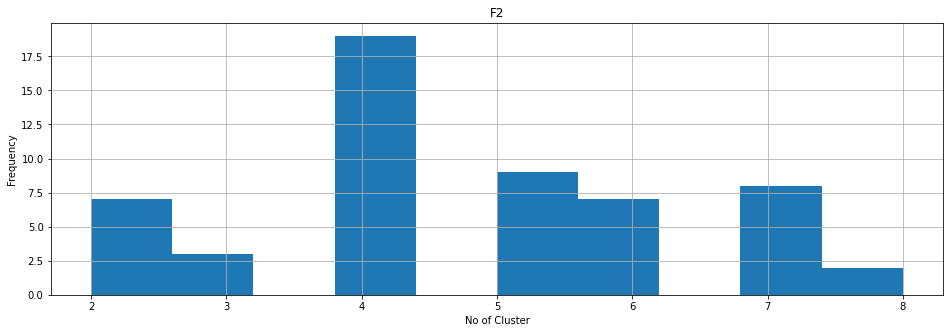

In [84]:
data1 = pd.read_csv(fileloc+'best_cluster_shil.csv')
data_index1 = [ 'F1', 'F2','F3','F4','F5','F6','F7','F8','F9','F10','F11', 'F12','F13','F14','F15','F16','F17','F18','F19','F20']
data1.columns = data_index1
axarr =data1.hist(column=["F2"])

for ax in axarr.flatten():
    ax.set_xlabel("No of Cluster")
    ax.set_ylabel("Frequency")


### Boxplot for the output files

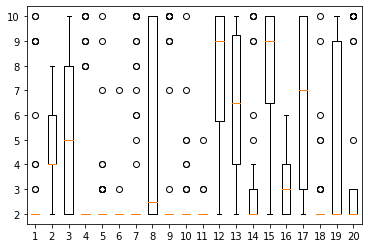

In [98]:
shilout_data=np.genfromtxt(fileloc+'best_cluster_shil.csv',delimiter=',')
plt.boxplot(shilout_data)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/best_cluster_shilout.png')


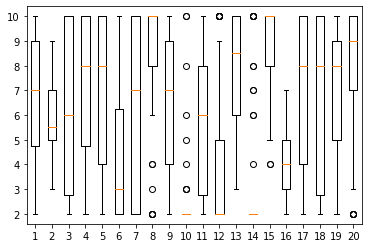

In [99]:
dbinx_data=np.genfromtxt(fileloc+'best_cluster_dbinx.csv',delimiter=',')
plt.boxplot(dbinx_data)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/best_cluster_dbinx.png')


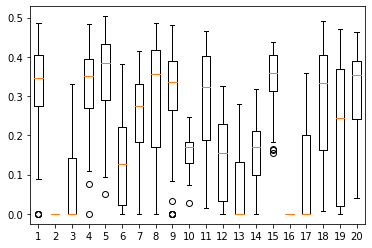

In [100]:
dbinx_data_n=np.genfromtxt(fileloc+'dbinx.csv',delimiter=',')
plt.boxplot(dbinx_data_n)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/dbinx.png')

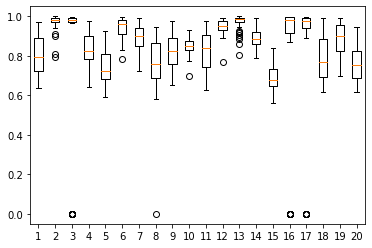

In [101]:
shilout_data_n=np.genfromtxt(fileloc+'shilout.csv',delimiter=',')
plt.boxplot(shilout_data_n)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/shilout.png')

### Histogram for the output files

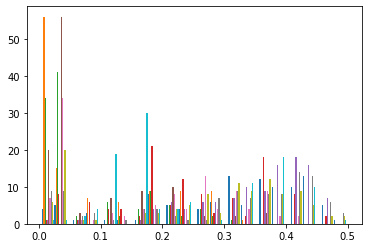

In [102]:
dbinx_h=np.genfromtxt(fileloc+'dbinx.csv',delimiter=',')
plt.hist(dbinx_h)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/dbinx_data_hist.png')


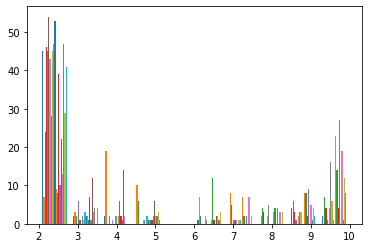

In [103]:
best_cluster_shil_h=np.genfromtxt(fileloc+'best_cluster_shil.csv',delimiter=',')
plt.hist(best_cluster_shil_h)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/best_cluster_shil_hist.png')

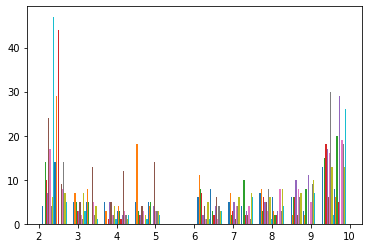

In [104]:
bestcluster_dbinx_h=np.genfromtxt(fileloc+'best_cluster_dbinx.csv',delimiter=',')
plt.hist(bestcluster_dbinx_h)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/best_cluster_dbinx_hist.png')

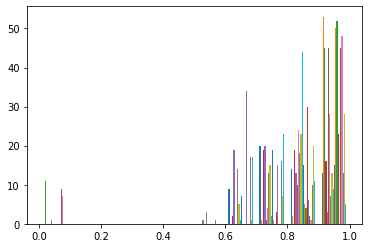

In [105]:

shilout_data_n=np.genfromtxt(fileloc+'shilout.csv',delimiter=',')
plt.hist(shilout_data_n)
fig = plt.gcf()
plt.show()
fig.savefig(fileloc+'/output_images/shilout_data_hist.png',dpi=100)